In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle
import os

path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsergebnisse\Results_8_WT_150k_CS1.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,0.1,1,1,2,374.0,25,415.0,41.0,23.28,585.0,100.0,90.4,NaN,NaN
1,0.2,2,2,1,1000.0,67,1018.0,18.0,10.04,54.0,90.4,86.3,1018.0,1072.0
2,0.3,3,1,3,1072.0,71,1096.0,24.0,13.89,3.0,98.2,92.5,NaN,NaN
3,0.4,4,3,1,1099.0,73,1102.0,3.0,1.57,715.0,92.5,91.9,1102.0,1139.0
4,1.1,1,1,2,520.0,35,579.0,59.0,33.44,680.0,100.0,77.9,NaN,NaN


## Reduzieren der Daten auf erste Wege des Tages

In [4]:
filt = df["Trip_no"] == 1
first_trip = df[filt]["Departure"]

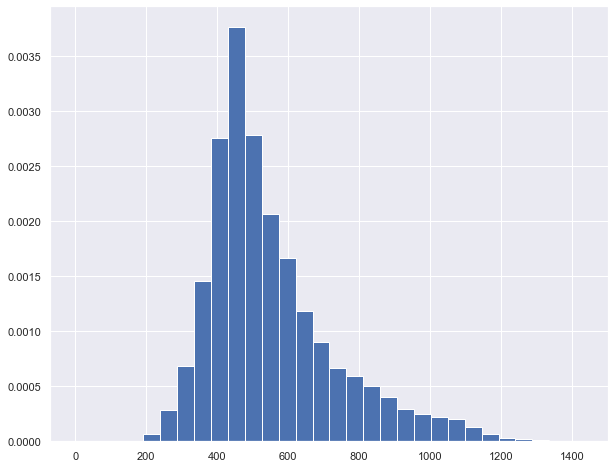

In [5]:
# Histogramm der Abfahrtszeiten der ersten Trips
sns.set()
plt.figure(figsize=(10,8))
count, bins, ignored = plt.hist(first_trip, bins = 30, density=True)

## Kernel Density Estimation Modell über Simulationsergebnis

In [6]:
from sklearn.neighbors import KernelDensity

In [7]:
x = np.linspace(-50, 1450, 1000)
model_data = np.array(first_trip)

In [8]:
# Erstellen Kernel Density Estimation Modell mit Bandbreite 18
kde_model = KernelDensity(bandwidth=18)
# Trainieren des Modells mit den Daten (np.newaxis transformiert den Reihen- zu Spaltenvektor) 
kde_model.fit(model_data[:, np.newaxis])
# übertragen in visaulisierbare Wahrscheinlichkeitsdichtefunktion
kde_log_pdf = kde_model.score_samples(x[:, np.newaxis])
kde_pdf = np.exp(kde_log_pdf)

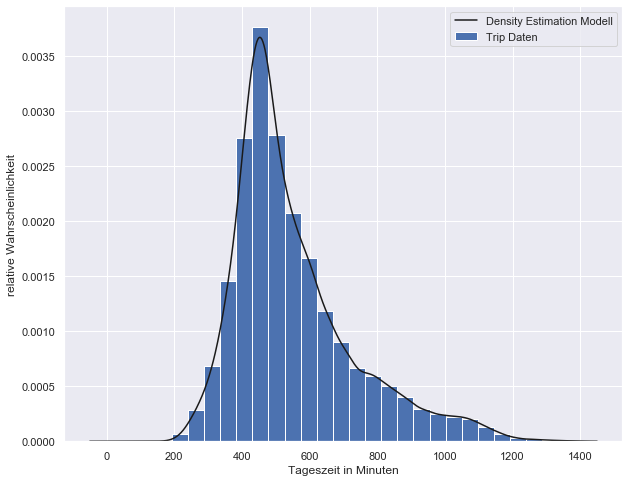

In [9]:
# Plottten des Modells
plt.figure(figsize=(10,8))
plt.hist(first_trip, bins=30, density=True);
plt.plot(x, kde_pdf, '-k');
labels = ["Density Estimation Modell", "Trip Daten"]
plt.legend(labels);
plt.xlabel("Tageszeit in Minuten");
plt.ylabel("relative Wahrscheinlichkeit");

## Vergleich mit Ausgangsdaten

In [10]:
# Laden der Liste aller ersten Fahren und des darauf basierenden KDE Modells
orig_trips_path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Werktag\Simulationsdaten\Liste_Initiale_Abfahrtszeit_Werktag.pickle"
orig_model_path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Werktag\Simulationsdaten\Modell_Initiale_Abfahrtszeit_Werktag.pickle"

first_trips_orig = pickle.load(open(orig_trips_path, "rb"))
kde_model_orig = pickle.load(open(orig_model_path, "rb"))

In [11]:
# übertragen in visaulisierbare Wahrscheinlichkeitsdichtefunktion
kde_log_pdf_orig = kde_model_orig.score_samples(x[:, np.newaxis])
kde_pdf_orig = np.exp(kde_log_pdf_orig)

## Plotten des Vergleichs

Text(0.5, 1.0, 'Vergleich der Wahrscheinlichkeitsdichtefunktion von Ausgangsdaten und Simulationsergebnis')

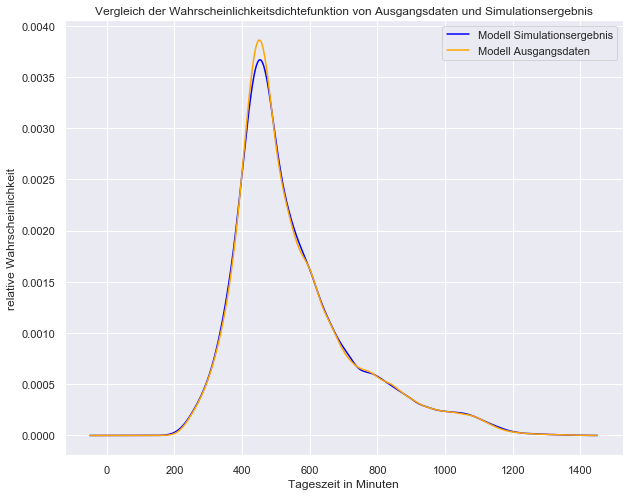

In [12]:
# Plottten der PDF
plt.figure(figsize=(10,8))
plt.plot(x, kde_pdf, '-k', label="Modell Simulationsergebnis", color="blue");
plt.plot(x, kde_pdf_orig, '-k', label="Modell Ausgangsdaten", color="orange");
plt.legend();
plt.xlabel("Tageszeit in Minuten");
plt.ylabel("relative Wahrscheinlichkeit");
plt.title("Vergleich der Wahrscheinlichkeitsdichtefunktion von Ausgangsdaten und Simulationsergebnis")

Text(0.5, 1.0, 'Vergleich der Histogramme von Ausgangsdaten und Simulationsergebnis')

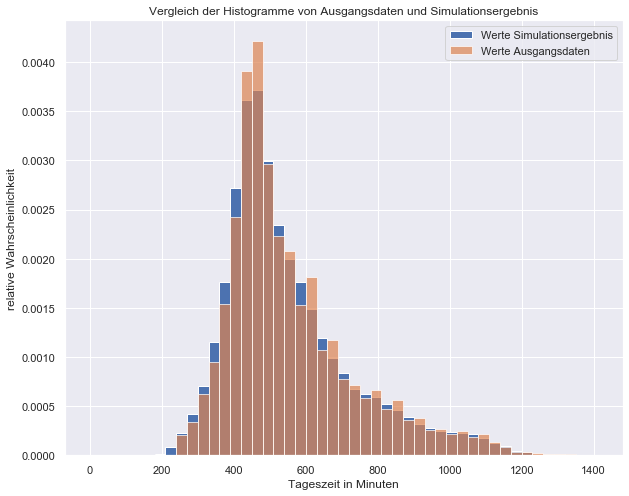

In [13]:
# Plottten der Histogramme
plt.figure(figsize=(10,8))
plt.hist(first_trip, label="Werte Simulationsergebnis", bins=range(0, int(max(first_trip)), 30), density=True);
plt.hist(first_trips_orig, label="Werte Ausgangsdaten", bins=range(0, int(max(first_trip)), 30), alpha=0.7, density=True);
plt.legend();
plt.xlabel("Tageszeit in Minuten");
plt.ylabel("relative Wahrscheinlichkeit");
plt.title("Vergleich der Histogramme von Ausgangsdaten und Simulationsergebnis")